# Convolutional Neural Networks

## Loss Functions in Classification

### Negative Log-Likelihood Loss (NLL Loss)

**Use Case:**
NLL Loss is primarily used for multiclass classification tasks where the model outputs log-probabilities for each class.

**Equation:**
$
\text{NLL Loss} = -\log(p(y))
$
where $ p(y) $ is the predicted probability of the true class $ y $.

**Expected Input:**
Log-probabilities, typically obtained from applying `log_softmax` to the raw logits.

**Key Characteristics:**
- Directly penalizes the log of the predicted probability for the true class.
- Requires the input to be in log-probability form.

**Assumptions and Limitations:**
- Assumes that the classes are mutually exclusive.
- Not suitable for multi-label classification without modifications.

**Practical Applications and Examples:**
- Image classification tasks where each image belongs to one of many classes.
- Language modeling tasks predicting the next word in a sequence.

---

### Cross-Entropy Loss

**Use Case:**
Cross-Entropy Loss is used for multiclass classification tasks with raw logits as inputs.

**Equation:**
$
\text{Cross-Entropy Loss} = -\sum_{c=1}^C p_c \log(\hat{p}_c) = -\log(\hat{p}_y)
$
where $ C $ is the number of classes, $ p_c $ is the true distribution (typically one-hot), and $ \hat{p}_c $ is the predicted probability for class $ c $.

**Expected Input:**
Raw logits, where the `softmax` function is applied internally to convert logits to probabilities.

**Key Characteristics:**
- Combines the `softmax` and `NLLLoss` into a single function for numerical stability.
- Suitable for tasks where the model outputs raw scores for each class.

**Assumptions and Limitations:**
- Assumes a single correct class per input.
- Sensitive to class imbalance if not handled properly.

**Practical Applications and Examples:**
- Multi-class image classification.
- Text classification tasks such as sentiment analysis.

---

### Binary Cross-Entropy (BCE) Loss

**Use Case:**
BCE Loss is used for binary classification tasks.

**Equation:**
$
\text{BCE Loss} = -[y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})]
$
where $ y $ is the true label and $ \hat{p} $ is the predicted probability of class 1.

**Expected Input:**
Probability values, usually obtained by applying the `sigmoid` function to raw logits.

**Key Characteristics:**
- Penalizes the model based on the predicted probability of class 1 versus the true label.
- Suitable for tasks with two classes or multi-label classification with independent binary decisions.

**Assumptions and Limitations:**
- Assumes that each output is independent in multi-label scenarios.
- Can be sensitive to class imbalance.

**Practical Applications and Examples:**
- Spam detection (spam vs. not spam).
- Medical diagnosis (disease vs. no disease).

---

### Summary of Key Points

- **NLL Loss** is ideal for multiclass classification with log-probabilities.
- **Cross-Entropy Loss** extends NLL Loss by combining `softmax` and `NLLLoss`, handling raw logits directly.
- **Binary Cross-Entropy Loss** is tailored for binary classification tasks, focusing on the probability of a single class.
- All three loss functions are foundational for training classification models, each suited to specific types of classification problems.

Epoch [1/20], Train Loss: 1.3633, Val Loss: 0.7049
Epoch [2/20], Train Loss: 0.4896, Val Loss: 0.2753
Epoch [3/20], Train Loss: 0.1885, Val Loss: 0.1075
Epoch [4/20], Train Loss: 0.0717, Val Loss: 0.0390
Epoch [5/20], Train Loss: 0.0245, Val Loss: 0.0127
Epoch [6/20], Train Loss: 0.0076, Val Loss: 0.0036
Epoch [7/20], Train Loss: 0.0020, Val Loss: 0.0009
Epoch [8/20], Train Loss: 0.0005, Val Loss: 0.0002
Epoch [9/20], Train Loss: 0.0001, Val Loss: 0.0000
Epoch [10/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [11/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [12/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [13/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [14/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [15/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [16/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [17/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [18/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [19/20], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [20/20], Train 

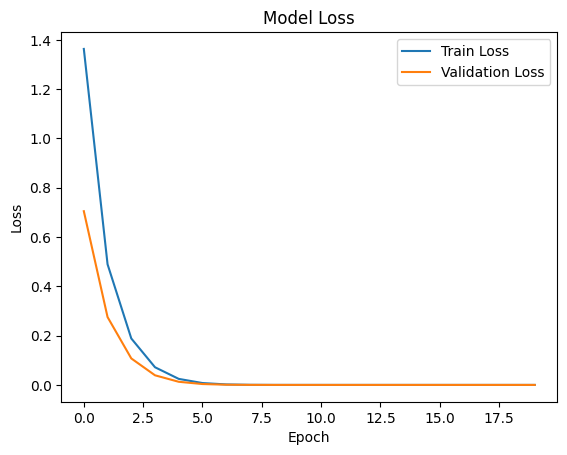

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.01
batch_size = 32
num_epochs = 20
input_size = 1
hidden_size = 50
num_classes = 1

# Use the existing X and y tensors
X = torch.randn(1000, input_size)
y = torch.randint(0, num_classes, (1000,))

# Split the dataset into training and validation sets
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Define your neural network architecture
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(num_classes, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.fc4 = nn.Linear(num_classes, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

# Initialize the model
model = SimpleClassifier(input_size, hidden_size, num_classes)

# Define the loss function
criterion = nn.MSELoss()

# Choose an optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store loss values
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.float().view(-1, 1))
        epoch_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_losses.append(epoch_loss / len(train_loader))

    # Validation step
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.float().view(-1, 1))
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Plot training and validation loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# MNIST Classification Using Convolutional Neural Networks (CNNs)

---

## Section 1: Theoretical Background

### Introduction to Convolutional Neural Networks (CNNs)

**Overview:**  
Convolutional Neural Networks (CNNs) are a class of deep learning models specifically designed for processing structured grid data such as images. They have achieved remarkable success in various computer vision tasks, including image classification, object detection, and segmentation.

**Key Components of CNNs:**

1. **Convolutional Layers:**
   - **Purpose:** Extract spatial hierarchies of features from input images.
   - **Operation:** Apply a set of learnable filters (kernels) that convolve across the input image to produce feature maps.
   - **Mathematical Formulation:**
     $
     (I * K)(i, j) = \sum_m \sum_n I(m, n) \cdot K(i - m, j - n)
     $
     where $ I $ is the input image, $ K $ is the kernel, and $ * $ denotes convolution.

2. **Activation Functions:**
   - **Purpose:** Introduce non-linearity into the network, enabling it to learn complex patterns.
   - **Common Functions:** ReLU (Rectified Linear Unit), Sigmoid, Tanh.
   - **ReLU Function:**
     $
     \text{ReLU}(x) = \max(0, x)
     $

3. **Pooling Layers:**
   - **Purpose:** Reduce the spatial dimensions of feature maps, decreasing computational complexity and controlling overfitting.
   - **Types:** Max Pooling, Average Pooling.
   - **Max Pooling Example:** For a 2x2 window, the maximum value within the window is selected.

4. **Fully Connected (Dense) Layers:**
   - **Purpose:** Combine the features extracted by convolutional and pooling layers to perform classification.
   - **Operation:** Each neuron is connected to every neuron in the previous layer.

5. **Softmax Layer:**
   - **Purpose:** Convert the output of the network into a probability distribution over classes.
   - **Equation:**
     $
     \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}
     $
     where $ z_i $ is the input to the $ i $-th class and $ C $ is the total number of classes.

**Architecture of a Typical CNN for MNIST Classification:**

1. **Input Layer:**  
   - MNIST images are 28x28 grayscale images.

2. **Convolutional Layer 1:**  
   - Number of filters: 32  
   - Kernel size: 3x3  
   - Activation: ReLU

3. **Pooling Layer 1:**  
   - Type: Max Pooling  
   - Window size: 2x2

4. **Convolutional Layer 2:**  
   - Number of filters: 64  
   - Kernel size: 3x3  
   - Activation: ReLU

5. **Pooling Layer 2:**  
   - Type: Max Pooling  
   - Window size: 2x2

6. **Fully Connected Layer:**  
   - Neurons: 128  
   - Activation: ReLU

7. **Output Layer:**  
   - Neurons: 10 (one for each MNIST class)  
   - Activation: Softmax

**Training Process:**

1. **Forward Pass:**  
   - Input data is passed through the network to obtain predictions.

2. **Loss Computation:**  
   - **Cross-Entropy Loss** is commonly used for classification tasks.
   - **Equation:**
     $
     \text{Cross-Entropy Loss} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
     $
     where $ y_i $ is the true label and $ \hat{y}_i $ is the predicted probability for class $ i $.

3. **Backward Pass (Backpropagation):**  
   - Compute gradients of the loss with respect to each parameter.
   - Update parameters using an optimization algorithm (e.g., SGD, Adam).

4. **Evaluation:**  
   - Assess the model's performance on validation and test datasets using metrics like accuracy.

**Assumptions and Limitations:**

- **Assumptions:**
  - Spatial hierarchies exist in the data.
  - Translation invariance is present (i.e., the object of interest can appear anywhere in the image).

- **Limitations:**
  - Requires large amounts of labeled data.
  - Computationally intensive, especially with deeper architectures.
  - Can be prone to overfitting if not properly regularized.

**Practical Applications and Examples:**

- **Handwritten Digit Recognition:**  
  - MNIST dataset classification is a standard benchmark for evaluating CNN performance.

- **Image and Video Recognition:**  
  - Object detection in photos and videos.

- **Medical Image Analysis:**  
  - Tumor detection in MRI scans.

**Summary of Key Points:**

- CNNs are powerful tools for image classification tasks due to their ability to capture spatial hierarchies.
- Key components include convolutional layers, activation functions, pooling layers, and fully connected layers.
- The typical CNN architecture for MNIST involves multiple convolutional and pooling layers followed by dense layers.
- Training involves forward passes, loss computation, backpropagation, and parameter updates.
- While effective, CNNs require significant computational resources and data.


Epoch [1/10], Loss: 1.6268
Epoch [2/10], Loss: 1.4868
Epoch [3/10], Loss: 1.4775
Epoch [4/10], Loss: 1.4754
Epoch [5/10], Loss: 1.4742
Epoch [6/10], Loss: 1.4743
Epoch [7/10], Loss: 1.4721
Epoch [8/10], Loss: 1.4725
Epoch [9/10], Loss: 1.4720
Epoch [10/10], Loss: 1.4724
Test Accuracy: 98.78%


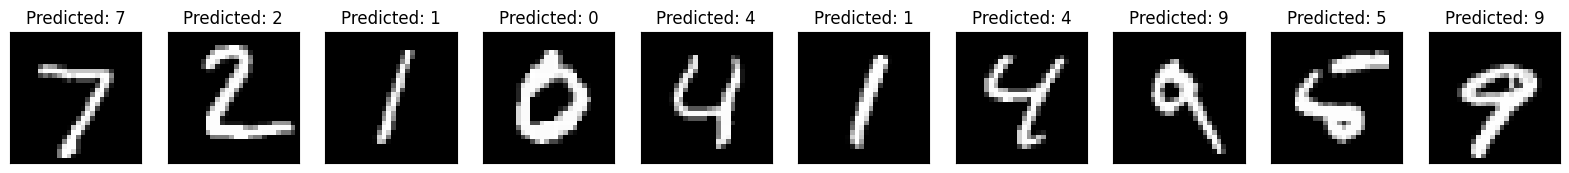

In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transformations for the MNIST dataset
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define DataLoaders for training and testing
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the CNN architecture
class CNNClassifier(nn.Module):
     def __init__(self):
          super(CNNClassifier, self).__init__()
          # Define convolutional layers
          self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
          self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
          # Define pooling layers
          self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
          # Define fully connected layers
          self.fc1 = nn.Linear(64 * 5 * 5, 128)
          self.fc2 = nn.Linear(128, 10)
          # Define activation functions
          self.relu = nn.ReLU()
          self.softmax = nn.Softmax(dim=1)
          
     def forward(self, x):
          # Implement the forward pass
          x = self.conv1(x)
          x = self.relu(x)
          x = self.pool(x)
          x = self.conv2(x)
          x = self.relu(x)
          x = self.pool(x)
          x = x.view(-1, 64 * 5 * 5)
          x = self.fc1(x)
          x = self.relu(x)
          x = self.fc2(x)
          x = self.softmax(x)
          return x

# Initialize the model
model = CNNClassifier()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 10

# Implement the training loop
for epoch in range(num_epochs):
     model.train()
     running_loss = 0.0
     for images, labels in train_loader:
          # Zero the parameter gradients
          optimizer.zero_grad()
          # Forward pass
          outputs = model(images)
          # Compute loss
          loss = criterion(outputs, labels)
          # Backward pass and optimization
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
     # Print training loss for the epoch
     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Implement the evaluation on the test dataset
model.eval()
correct = 0
total = 0
with torch.no_grad():
     for images, labels in test_loader:
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Visualize some test results
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
     axes[i].imshow(images[i].squeeze(), cmap='gray')
     axes[i].set_xticks([])
     axes[i].set_yticks([])
     axes[i].set_title(f'Predicted: {predicted[i]}')
plt.show()

# Exploring Activation Functions in PyTorch

---

## Section 1: Theoretical Background

### Introduction to Activation Functions

**Overview:**  
Activation functions are crucial components in neural networks that introduce non-linearity into the model. They enable the network to learn and represent complex patterns in the data by allowing it to capture non-linear relationships. Without activation functions, neural networks would essentially perform linear transformations, limiting their ability to model intricate data distributions.

### Key Activation Functions in PyTorch

Below are six widely used activation functions in PyTorch, each serving unique purposes and offering distinct advantages:

1. **ReLU (Rectified Linear Unit)**
2. **Sigmoid**
3. **Tanh (Hyperbolic Tangent)**
4. **Leaky ReLU**
5. **ELU (Exponential Linear Unit)**
6. **Softmax**

---

#### 1. ReLU (Rectified Linear Unit)

**Equation:**  
$
\text{ReLU}(x) = \max(0, x)
$

**Characteristics:**
- **Non-Linearity:** Introduces non-linearity while being computationally efficient.
- **Sparsity:** Outputs zero for negative inputs, leading to sparse activations.
- **Advantages:**
  - Mitigates the vanishing gradient problem.
  - Faster convergence during training.
- **Limitations:**
  - Can suffer from the "dying ReLU" problem where neurons get stuck and only output zero.

**Applications:**
- Widely used in hidden layers of deep neural networks for tasks like image and speech recognition.

---

#### 2. Sigmoid

**Equation:**  
$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$

**Characteristics:**
- **Output Range:** Maps input values to a range between 0 and 1.
- **Smooth Gradient:** Provides smooth gradients, making it suitable for probabilistic interpretations.
- **Advantages:**
  - Useful for binary classification tasks as it can represent probabilities.
- **Limitations:**
  - Prone to vanishing gradients.
  - Outputs are not zero-centered, which can affect optimization.

**Applications:**
- Output layer for binary classification problems.

---

#### 3. Tanh (Hyperbolic Tangent)

**Equation:**  
$
\text{Tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$

**Characteristics:**
- **Output Range:** Maps input values to a range between -1 and 1.
- **Zero-Centered:** Outputs are zero-centered, aiding in optimization.
- **Advantages:**
  - Provides stronger gradients compared to sigmoid.
- **Limitations:**
  - Still susceptible to vanishing gradients for large input magnitudes.

**Applications:**
- Hidden layers in neural networks where zero-centered outputs are beneficial.

---

#### 4. Leaky ReLU

**Equation:**  
$
\text{Leaky ReLU}(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{otherwise}
\end{cases}
$
where $ \alpha $ is a small constant (e.g., 0.01).

**Characteristics:**
- **Non-Zero Output for Negative Inputs:** Allows a small, non-zero gradient when the unit is not active.
- **Advantages:**
  - Mitigates the "dying ReLU" problem by ensuring that neurons can recover during training.
- **Limitations:**
  - The choice of $ \alpha $ is hyperparameter-dependent and may require tuning.

**Applications:**
- Used in hidden layers to provide the benefits of ReLU while addressing its limitations.

---

#### 5. ELU (Exponential Linear Unit)

**Equation:**  
$
\text{ELU}(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha (e^{x} - 1) & \text{otherwise}
\end{cases}
$
where $ \alpha $ is a hyperparameter (commonly set to 1).

**Characteristics:**
- **Smooth Transition:** Provides a smoother transition for negative inputs.
- **Advantages:**
  - Reduces bias shift by allowing mean activations closer to zero.
  - Helps in faster convergence.
- **Limitations:**
  - Computationally more expensive than ReLU.

**Applications:**
- Hidden layers in deep networks where smoother gradients are beneficial.

---

#### 6. Softmax

**Equation:**  
$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
$
where $ z_i $ is the input to the $ i $-th class and $ C $ is the total number of classes.

**Characteristics:**
- **Probability Distribution:** Converts logits into probabilities that sum to 1.
- **Usage:** Typically used in the output layer for multi-class classification.
- **Advantages:**
  - Facilitates comparison between different class probabilities.
- **Limitations:**
  - Can be sensitive to outliers and large input values.

**Applications:**
- Output layer for multi-class classification problems.

---

### Summary of Key Points

- **Non-Linearity:** Activation functions introduce non-linearity, enabling neural networks to model complex patterns.
- **Gradient Flow:** Different activation functions affect how gradients propagate during training, influencing convergence.
- **Output Characteristics:** The choice of activation function depends on the desired output range and the specific task (e.g., classification vs. regression).
- **Trade-offs:** Balancing computational efficiency, gradient properties, and output characteristics is essential when selecting activation functions.

Activation: ReLU, Epoch [100/1000], Loss: 0.6146
Activation: ReLU, Epoch [200/1000], Loss: 0.6127
Activation: ReLU, Epoch [300/1000], Loss: 0.6125
Activation: ReLU, Epoch [400/1000], Loss: 0.6125
Activation: ReLU, Epoch [500/1000], Loss: 0.6125
Activation: ReLU, Epoch [600/1000], Loss: 0.6125
Activation: ReLU, Epoch [700/1000], Loss: 0.6125
Activation: ReLU, Epoch [800/1000], Loss: 0.6125
Activation: ReLU, Epoch [900/1000], Loss: 0.6125
Activation: ReLU, Epoch [1000/1000], Loss: 0.6125


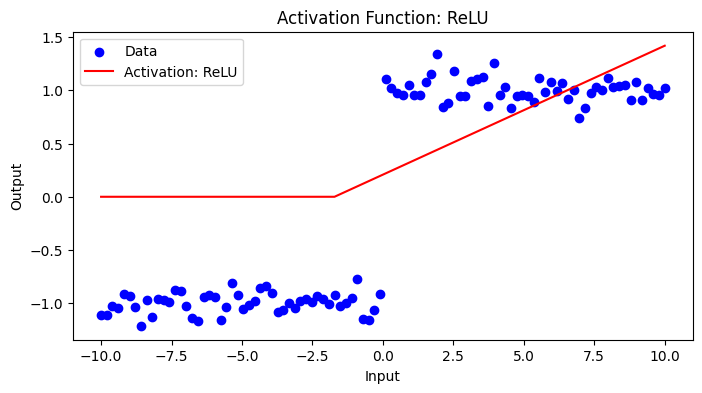

Activation: Sigmoid, Epoch [100/1000], Loss: 0.6556
Activation: Sigmoid, Epoch [200/1000], Loss: 0.6202
Activation: Sigmoid, Epoch [300/1000], Loss: 0.6033
Activation: Sigmoid, Epoch [400/1000], Loss: 0.5927
Activation: Sigmoid, Epoch [500/1000], Loss: 0.5852
Activation: Sigmoid, Epoch [600/1000], Loss: 0.5795
Activation: Sigmoid, Epoch [700/1000], Loss: 0.5750
Activation: Sigmoid, Epoch [800/1000], Loss: 0.5713
Activation: Sigmoid, Epoch [900/1000], Loss: 0.5682
Activation: Sigmoid, Epoch [1000/1000], Loss: 0.5656


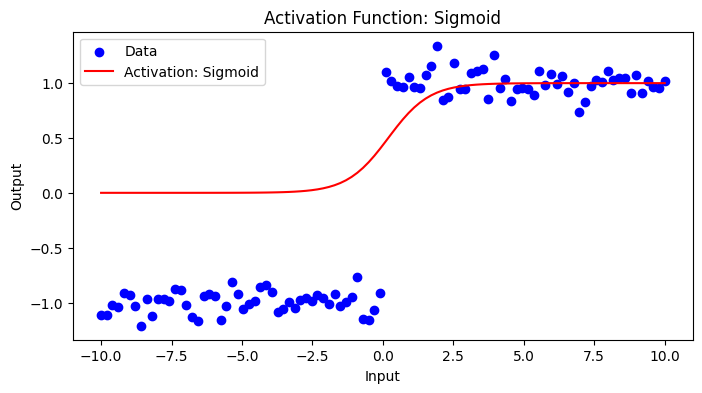

Activation: Tanh, Epoch [100/1000], Loss: 0.0822
Activation: Tanh, Epoch [200/1000], Loss: 0.0712
Activation: Tanh, Epoch [300/1000], Loss: 0.0648
Activation: Tanh, Epoch [400/1000], Loss: 0.0605
Activation: Tanh, Epoch [500/1000], Loss: 0.0573
Activation: Tanh, Epoch [600/1000], Loss: 0.0548
Activation: Tanh, Epoch [700/1000], Loss: 0.0528
Activation: Tanh, Epoch [800/1000], Loss: 0.0511
Activation: Tanh, Epoch [900/1000], Loss: 0.0496
Activation: Tanh, Epoch [1000/1000], Loss: 0.0483


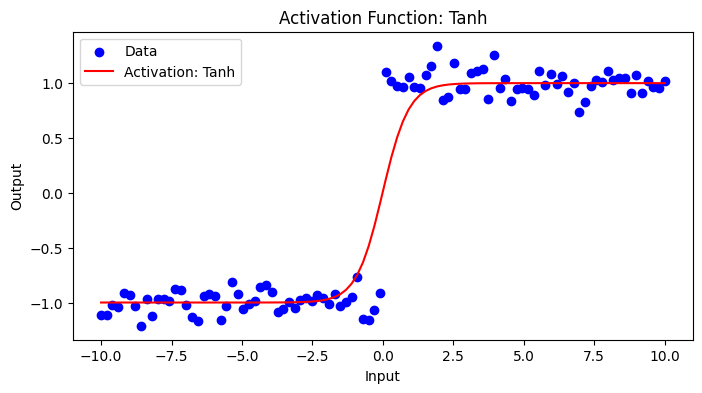

Activation: LeakyReLU, Epoch [100/1000], Loss: 0.6092
Activation: LeakyReLU, Epoch [200/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [300/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [400/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [500/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [600/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [700/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [800/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [900/1000], Loss: 0.6082
Activation: LeakyReLU, Epoch [1000/1000], Loss: 0.6082


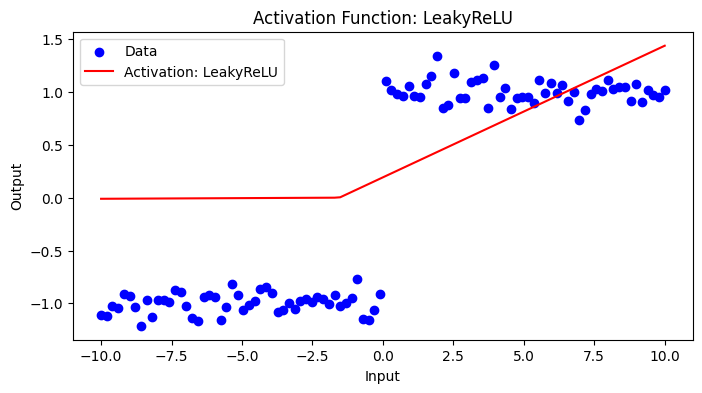

Activation: ELU, Epoch [100/1000], Loss: 0.3252
Activation: ELU, Epoch [200/1000], Loss: 0.2956
Activation: ELU, Epoch [300/1000], Loss: 0.2856
Activation: ELU, Epoch [400/1000], Loss: 0.2832
Activation: ELU, Epoch [500/1000], Loss: 0.2828
Activation: ELU, Epoch [600/1000], Loss: 0.2827
Activation: ELU, Epoch [700/1000], Loss: 0.2827
Activation: ELU, Epoch [800/1000], Loss: 0.2827
Activation: ELU, Epoch [900/1000], Loss: 0.2827
Activation: ELU, Epoch [1000/1000], Loss: 0.2827


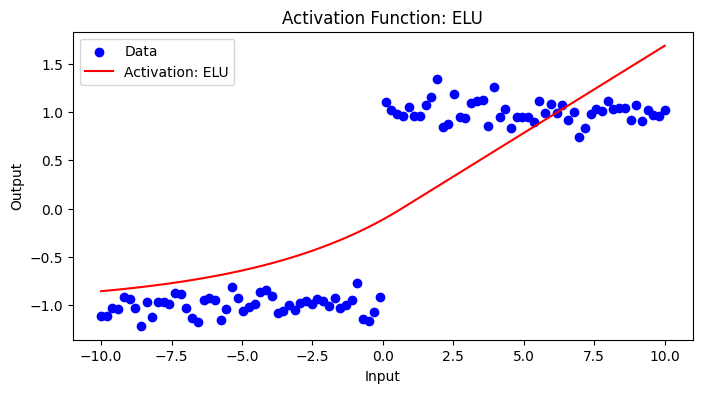

Activation: Softmax, Epoch [100/1000], Loss: 2.0047
Activation: Softmax, Epoch [200/1000], Loss: 2.0047
Activation: Softmax, Epoch [300/1000], Loss: 2.0047
Activation: Softmax, Epoch [400/1000], Loss: 2.0047
Activation: Softmax, Epoch [500/1000], Loss: 2.0047
Activation: Softmax, Epoch [600/1000], Loss: 2.0047
Activation: Softmax, Epoch [700/1000], Loss: 2.0047
Activation: Softmax, Epoch [800/1000], Loss: 2.0047
Activation: Softmax, Epoch [900/1000], Loss: 2.0047
Activation: Softmax, Epoch [1000/1000], Loss: 2.0047


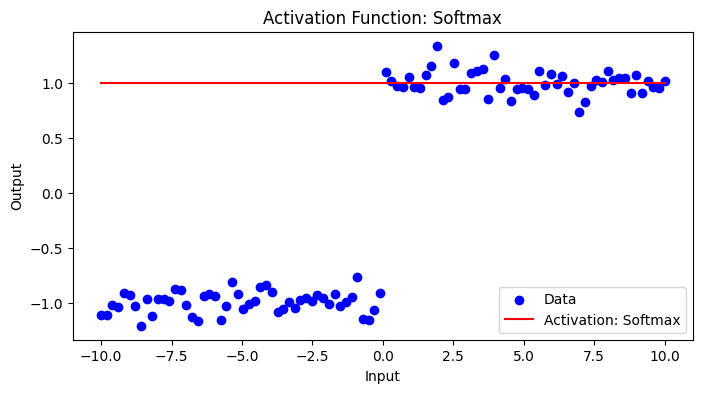

In [3]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple neural network to demonstrate activation functions
class ActivationDemoNN(nn.Module):
    def __init__(self, activation_name):
        super(ActivationDemoNN, self).__init__()
        self.fc = nn.Linear(1, 1)

        # Initialize the chosen activation function based on activation_name
        if activation_name == 'ReLU':
            self.activation = nn.ReLU()
        elif activation_name == 'Sigmoid':
            self.activation = nn.Sigmoid()
        elif activation_name == 'Tanh':
            self.activation = nn.Tanh()
        elif activation_name == 'LeakyReLU':
            self.activation = nn.LeakyReLU()
        elif activation_name == 'ELU':
            self.activation = nn.ELU()
        elif activation_name == 'Softmax':
            self.activation = nn.Softmax(dim=1)
        else:
            raise ValueError(f"Unknown activation function: {activation_name}")

    def forward(self, x):
        out = self.fc(x)
        out = self.activation(out)
        return out

# Hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Generate synthetic data
torch.manual_seed(0)
X = torch.linspace(-10, 10, 100).unsqueeze(1)
y = torch.sign(X) + 0.1 * torch.randn(X.size())

# Define a function to train the network and plot the results
def train_and_plot(activation_name):
    model = ActivationDemoNN(activation_name)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X)
        loss = criterion(outputs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Activation: {activation_name}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Plot the activation function
    model.eval()
    with torch.no_grad():
        predicted = model(X).detach()

    plt.figure(figsize=(8,4))
    plt.scatter(X.numpy(), y.numpy(), label='Data', color='blue')
    plt.plot(X.numpy(), predicted.numpy(), label=f'Activation: {activation_name}', color='red')
    plt.title(f'Activation Function: {activation_name}')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.show()

# List of activation functions to demonstrate
activation_functions = ['ReLU', 'Sigmoid', 'Tanh', 'LeakyReLU', 'ELU', 'Softmax']

# Iterate over each activation function, train the model, and plot the results
for act_fn in activation_functions:
    train_and_plot(act_fn)

### **Skip Connections and Residual Blocks (ResBlocks)**

Skip connections, a fundamental component of Residual Networks (ResNets), are a powerful technique in deep learning architectures to combat the vanishing gradient problem and enable training of very deep networks. By adding the input of a layer directly to its output, skip connections create an alternative shortcut pathway for the gradient during backpropagation. This design promotes the flow of gradients throughout the network, making deep networks easier to optimize and improving convergence rates.

#### **Mathematical Formulation**
In a typical ResBlock, if we denote the input by $ x $, the layers in the block perform transformations $ F(x) $, and the output of the block is $ x + F(x) $. Mathematically, this can be represented as:
$ H(x) = F(x) + x $
where $ H(x) $ is the function representing the entire residual block's output.

#### **Step-by-step Derivation**
1. **Forward Pass:**
   - Input: $ x $
   - Output after transformation $ F(x) $ (e.g., through convolution, BatchNorm, ReLU)
   - Final output $ H(x) = F(x) + x $

2. **Backward Pass (Simplified):**
   - Gradient from the next layer: $ \frac{\partial \mathcal{L}}{\partial H(x)} $
   - Gradient w.r.t. $ F(x) $: $ \frac{\partial \mathcal{L}}{\partial F(x)} $ is directly added to $ \frac{\partial \mathcal{L}}{\partial x} $

#### **Visual Aids**
- Diagrams of a basic block vs. a residual block.
- Gradient flow in networks with and without skip connections.

#### **Key Assumptions and Limitations**
- Assumes layers within $ F $ are differentiable.
- Effective in very deep networks; less impactful in shallow ones.

#### **Practical Applications**
- Image recognition and classification with deep ResNets.
- Speech recognition and machine translation benefiting from deeper architectures.

#### **Summary**
Skip connections help mitigate the vanishing gradient problem, allowing for the training of deeper neural networks. They improve learning speed and model performance by enhancing gradient flow during training.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a basic block
class BasicBlock(nn.Module):
    def __init__(self, in_planes, out_planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_planes)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        return out

# Define a Residual Block
class ResBlock(nn.Module):
    def __init__(self, in_planes, out_planes, stride=1):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_planes)
        self.skip = nn.Sequential()
        if stride != 1 or in_planes != out_planes:
            self.skip = nn.Sequential(
                nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)) + self.skip(x))
        return out

# Define the model class using BasicBlock and ResBlock
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.conv1 = BasicBlock(3, 64, stride=1)
        self.layer1 = ResBlock(64, 128, stride=2)
        self.layer2 = ResBlock(128, 256, stride=2)
        self.layer3 = ResBlock(256, 512, stride=2)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.adaptive_avg_pool2d(out, 1)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Initialize the model, define loss and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Implement the training loop
def train(num_epochs):
    net.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
                running_loss = 0.0

# Evaluate the model on a simple dataset (e.g., CIFAR-10)
def evaluate():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%")

# Train and evaluate the model
train(num_epochs=2)
evaluate()

Files already downloaded and verified
Files already downloaded and verified
[1, 100] loss: 1.790
[1, 200] loss: 1.539
[1, 300] loss: 1.404
[1, 400] loss: 1.309
[1, 500] loss: 1.262
[2, 100] loss: 1.214
[2, 200] loss: 1.166
[2, 300] loss: 1.144
[2, 400] loss: 1.085
[2, 500] loss: 1.075
Accuracy of the network on the 10000 test images: 58.10%
